# ECE 57000 Assignment 3 Exercise

Ethan Glaser


## Exercise 1: Why use a CNN rather than only fully connected layers? (MNIST)

In this exercise, you will build two models for the **MNIST** dataset: one uses only fully connected layers and another uses a standard CNN layout (convolution layers everywhere except the last layer is fully connected layer). The two models should be built with roughly the same accuracy performance, your task is to compare the number of network parameters (a huge number of parameters can affect training/testing time, memory requirements, overfitting, etc.).

### Task 1: Following the structure used in the instructions, you should create

*   One network named **OurFC** which should consist with only fully connected layers

  *   You should decide how many layers and how many hidden dimensions you want in your network 
  *   Your final accuracy on the test dataset should lie roughly around 90% ($\pm$2%)
  *   There is no need to make the neural network unnecessarily complex, your total training time should no longer than 3 mins

*   Another network named **OurCNN** which applys a standard CNN structure
  *   Again, you should decide how many layers and how many channels you want for each layer.
  *   Your final accuracy also should lie roughly around 90% ($\pm$2%)
  *   A standard CNN structure can be composed as **[Conv2d, MaxPooling, ReLU] x num_conv_layers + FC x num_fc_layers**

* Train and test your network on MNIST data as in the instructions

In [1]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import torch.optim as optim
import torchvision

class OurFC(nn.Module): # Any neural generated network should be generate

    def __init__(self):
        super(OurFC, self).__init__()
        self.l1 = nn.Linear(784, 280)
        self.relu = nn.ReLU()
        self.l3 = nn.Linear(280, 10)
        
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.l1(x)
        x = self.relu(x)
        x = self.l3(x)
        return F.log_softmax(x)

class OurCNN(nn.Module): # Any neural generated network should be generate

  def __init__(self):
    super(OurCNN, self).__init__()
    self.conv = nn.Conv2d(1, 3, kernel_size=5, padding=(1,1))
    self.fc = nn.Linear(507, 10)

  def forward(self, x):
    x = self.conv(x)        # x now has shape (batchsize x 3 x 24 x 24)
    x = F.relu(F.max_pool2d(x,2))  # x now has shape (batchsize x 3 x 12 x 12)
    x = x.view(-1, 507)      # x now has shape (batchsize x 432)
    x = F.relu(self.fc(x))     # x has shape (batchsize x 10)
    return F.log_softmax(x,-1)

def train(epoch):

  classifier.train() # we need to set the mode for our model

  for batch_idx, (images, targets) in enumerate(train_loader):

    optimizer.zero_grad()
    output = classifier(images)
    loss = F.nll_loss(output, targets) # Here is a typical loss function (negative log likelihood)
    loss.backward()
    optimizer.step()

    if batch_idx % 10 == 0: # We record our output every 10 batches
      train_losses.append(loss.item()) # item() is to get the value of the tensor directly
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    if batch_idx % 100 == 0: # We visulize our output every 10 batches
      print(f'Epoch {epoch}: [{batch_idx*len(images)}/{len(train_loader.dataset)}] Loss: {loss.item()}')

def test(epoch):

  classifier.eval() # we need to set the mode for our model

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for images, targets in test_loader:
      output = classifier(images)
      test_loss += F.nll_loss(output, targets, reduction='sum').item()
      pred = output.data.max(1, keepdim=True)[1] # we get the estimate of our result by look at the largest class value
      correct += pred.eq(targets.data.view_as(pred)).sum() # sum up the corrected samples
  
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  test_counter.append(len(train_loader.dataset)*epoch)

  print(f'Test result on epoch {epoch}: Avg loss is {test_loss}, Accuracy: {100.*correct/len(test_loader.dataset)}%')


transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                      torchvision.transforms.Normalize((0.1307,),(0.3081,))])

train_dataset = torchvision.datasets.MNIST('/data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST('/data', train=False, download=True, transform=transform)

batch_size_train, batch_size_test = 64, 1000

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size_test, shuffle=False)

classifier = OurFC()
optimizer = optim.SGD(classifier.parameters(), lr=0.01, momentum=0.8)
train_losses = []
train_counter = []
test_losses = []
test_counter = []
max_epoch = 3
print("Fully Connected:")
for epoch in range(1, max_epoch+1):
  train(epoch)
  test(epoch)
fc_classifier = classifier

classifier = OurCNN()
optimizer = optim.SGD(classifier.parameters(), lr=0.01, momentum=0.8)
train_losses = []
train_counter = []
test_losses = []
test_counter = []
max_epoch = 3
print("CNN:")
for epoch in range(1, max_epoch+1):
  train(epoch)
  test(epoch)
cnn_classifier = classifier


Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz to /data/MNIST/raw


Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz to /data/MNIST/raw



Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz to /data/MNIST/raw


Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /data/MNIST/raw
Processing...
Done!
Fully Connected:


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 1: [0/60000] Loss: 2.3385589122772217
Epoch 1: [6400/60000] Loss: 0.3527112901210785
Epoch 1: [12800/60000] Loss: 0.541822612285614
Epoch 1: [19200/60000] Loss: 0.2447480708360672
Epoch 1: [25600/60000] Loss: 0.20694458484649658
Epoch 1: [32000/60000] Loss: 0.27373960614204407
Epoch 1: [38400/60000] Loss: 0.17209705710411072
Epoch 1: [44800/60000] Loss: 0.21168701350688934
Epoch 1: [51200/60000] Loss: 0.3949653208255768
Epoch 1: [57600/60000] Loss: 0.14713074266910553
Test result on epoch 1: Avg loss is 0.17958302917480468, Accuracy: 94.80000305175781%
Epoch 2: [0/60000] Loss: 0.09650825709104538
Epoch 2: [6400/60000] Loss: 0.3621407747268677
Epoch 2: [12800/60000] Loss: 0.06734824180603027
Epoch 2: [19200/60000] Loss: 0.15963274240493774
Epoch 2: [25600/60000] Loss: 0.10437551140785217
Epoch 2: [32000/60000] Loss: 0.14458763599395752
Epoch 2: [38400/60000] Loss: 0.1093437522649765
Epoch 2: [44800/60000] Loss: 0.06003553420305252
Epoch 2: [51200/60000] Loss: 0.22534427046775818
E

### Task 2: Compare the number of parameters that are used in both your neural networks by printing out the total number of parameters for both of your networks.

In [2]:
total_params = sum(p.numel() for p in fc_classifier.parameters())
print(f'Our fully-connected neural network has a total of {total_params} parameters')
total_params = sum(p.numel() for p in cnn_classifier.parameters())
print(f'Our convolution neural network has a total of {total_params} parameters')

Our fully-connected neural network has a total of 222610 parameters
Our convolution neural network has a total of 5158 parameters


## Exercise 2: Train classifier on CIFAR-10 data.
Now, lets move our dataset to color images. CIFAR-10 dataset is another widely used dataset. Here all images have colors, i.e each image has 3 color channels instead of only one channel in MNIST. You need to pay more attention to the dimension of the data when it is walking through your network.

### Task 1:
Set up a `train_loader` and `test_loader` for the CIFAR-10 data, and plot a figure:

*   3 x 3 subplot
*   each subplot is a randomly chosen image from the test dataset
*   label each image with its label

The corresponding names of the classes is given as 
`classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')`

Note: In your transforms, the normalizing constant is given as `transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])`

Extracting /data/cifar-10-python.tar.gz to /data
Files already downloaded and verified


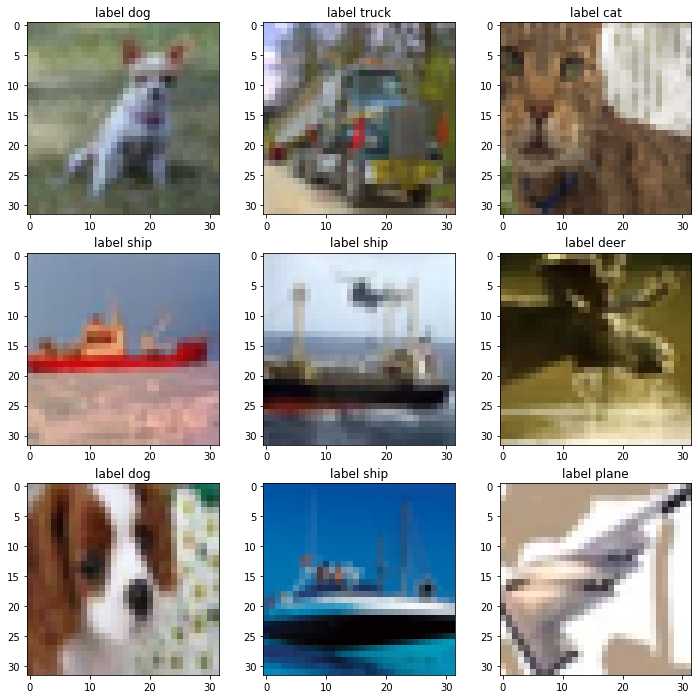

In [3]:
import matplotlib.pyplot as plt
import numpy as np

transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                      torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_dataset = torchvision.datasets.CIFAR10('/data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10('/data', train=False, download=True, transform=transform)
batch_size_train, batch_size_test = 64, 1000
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size_test, shuffle=False)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
batch_idx, (images, labels) = next(enumerate(train_loader))
fig, ax = plt.subplots(3,3)
fig.set_size_inches(12,12)
for i in range(3):
  for j in range(3):
    ax[i,j].imshow(np.transpose((torchvision.utils.make_grid(images[i*3+j] / 2 + 0.5).numpy()), (1, 2, 0)))
    ax[i,j].set_title(f'label {classes[labels[i*3+j]]}')
fig.show()

### Task 2:
Set up a convolutional neural network and have your data trained on it. You have to decide all the details in your network, overall your neural network should meet the following standards:


*   You should not use more than three convolutional layers and three fully connected layers
*   Accuracy on the test dataset should be roughly 50%



In [4]:
class Our_CIFAR_CNN(nn.Module):
    def __init__(self):
        super(Our_CIFAR_CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(400, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

def train2(epoch):

  classifier.train() # we need to set the mode for our model

  for batch_idx, (images, labels) in enumerate(train_loader):

    optimizer.zero_grad()
    output = classifier(images)
    loss = F.nll_loss(output, labels) # Here is a typical loss function (negative log likelihood)
    loss.backward()
    optimizer.step()

    if batch_idx % 10 == 0: # We record our output every 10 batches
      train_losses.append(loss.item()) # item() is to get the value of the tensor directly
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    if batch_idx % 100 == 0: # We visulize our output every 10 batches
      print(f'Epoch {epoch}: [{batch_idx*len(images)}/{len(train_loader.dataset)}] Loss: {loss.item()}')
      
def test2(epoch):

  classifier.eval() # we need to set the mode for our model

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for i, (images, targets) in enumerate(test_loader):
      output = classifier(images)
      test_loss += F.nll_loss(output, targets, reduction='sum').item()
      pred = output.data.max(1, keepdim=True)[1] # we get the estimate of our result by look at the largest class value
      if pred[i] != targets[i] and len(incorrect_images) < 3:
        incorrect_images.append({"image": images[i], "pred": classes[pred[i][0]], "label": classes[targets[i]]})
      correct += pred.eq(targets.data.view_as(pred)).sum() # sum up the corrected samples
      count = 0


  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  test_counter.append(len(train_loader.dataset)*epoch)

  print(f'Test result on epoch {epoch}: Avg loss is {test_loss}, Accuracy: {100.*correct/len(test_loader.dataset)}%')
  return incorrect_images

classifier = Our_CIFAR_CNN()
optimizer = optim.SGD(classifier.parameters(), lr=0.01, momentum=0.8)
train_losses = []
train_counter = []
test_losses = []
test_counter = []
incorrect_images = []
max_epoch = 3
for epoch in range(1, max_epoch+1):
  train2(epoch)
  test2(epoch)


Epoch 1: [0/50000] Loss: 2.3082096576690674
Epoch 1: [6400/50000] Loss: 2.2322938442230225
Epoch 1: [12800/50000] Loss: 2.103407144546509
Epoch 1: [19200/50000] Loss: 1.8366680145263672
Epoch 1: [25600/50000] Loss: 1.8325966596603394
Epoch 1: [32000/50000] Loss: 1.7458053827285767
Epoch 1: [38400/50000] Loss: 1.6550403833389282
Epoch 1: [44800/50000] Loss: 1.6945877075195312
Test result on epoch 1: Avg loss is 1.5192115600585938, Accuracy: 44.709999084472656%
Epoch 2: [0/50000] Loss: 1.558587908744812
Epoch 2: [6400/50000] Loss: 1.3575570583343506
Epoch 2: [12800/50000] Loss: 1.2319568395614624
Epoch 2: [19200/50000] Loss: 1.449998378753662
Epoch 2: [25600/50000] Loss: 1.3322200775146484
Epoch 2: [32000/50000] Loss: 1.5484281778335571
Epoch 2: [38400/50000] Loss: 1.2818834781646729
Epoch 2: [44800/50000] Loss: 1.1742273569107056
Test result on epoch 2: Avg loss is 1.3864020385742188, Accuracy: 50.4900016784668%
Epoch 3: [0/50000] Loss: 1.4393504858016968
Epoch 3: [6400/50000] Loss: 1.3

### Task 3:
Plot some misclassified images in your test dataset:

*   select three images that are **misclassified** by your neural network
*   label each images with true label and predicted label



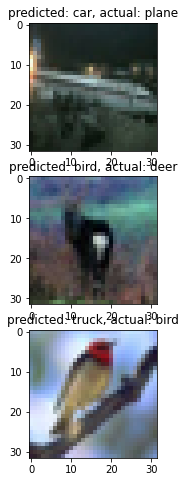

In [56]:
f, axarr = plt.subplots(3)
f.set_size_inches(24, 8)

for i in range(3):
  disp = np.transpose((torchvision.utils.make_grid(incorrect_images[i]['image'] / 2 + 0.5).numpy()), (1, 2, 0))
  axarr[i].imshow(disp)
  axarr[i].set_title('predicted: ' + incorrect_images[i]['pred'] + ', actual: ' + incorrect_images[i]['label'])
f.show()

Questions (0 points): Does the mis-classified images somehow also misleading for human eyes? I.e, Does a human also have a high probabability of misclassifying those images?

The bird is pretty easy to classify, but the deer and plane were both very hard for me to identify without actually knowing the actual label.